In [154]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

#參考文章：https://www.kaggle.com/nishimoto/very-simple-linear-models-pls

In [155]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [156]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
testID = test['building_id']

#data = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
#data.drop(['Id'], axis=1, inplace=True)
#df_all = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
#df_all.drop(['Id'], axis=1, inplace=True)

In [157]:
print(f"train shape : {train.shape}")
print(f" test shape : {test.shape}")

train shape : (60000, 235)
 test shape : (10000, 234)


In [158]:
#瞭解資料型別
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 235 entries, building_id to total_price
dtypes: float64(37), int64(197), object(1)
memory usage: 107.6+ MB


In [159]:
#train.corr('kendall')

In [160]:
# 描述data物件型態的統計資訊（個數、種類、出現頻率最高的種類及其次數）
print(f"categorical features: {train.describe(include='O').shape}")
# 查詢非數值資訊
train.describe(include="O")

categorical features: (4, 1)


,building_id
count,60000
unique,60000
top,jA9mV4uTNlna8D0p
freq,1


In [161]:
# 瞭解資料的分佈情況
train.describe()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,3103.000000,1.393500e+04,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0,60000.000000,6.000000e+04
mean,7.267917,11.414533,19488.957917,7.638250,1.931817,2.319200,11050.437183,1.585700,7.211837,5.025058e+04,...,60.867700,0.995800,252.823100,0.999867,5276.668033,1.0,16474.836600,1.0,101.044751,1.293727e+07
std,2.170741,4.751677,727.331019,5.070314,1.589972,1.399528,4344.018090,0.778952,20.453902,3.973488e+04,...,88.512972,0.064672,322.694074,0.011546,3856.219059,0.0,8998.020659,0.0,80.216061,5.522463e+07
min,1.000000,3.000000,18112.000000,1.000000,0.000000,0.000000,123.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,19.000000,1.0,30.000000,1.0,0.064766,2.261495e+05
25%,8.000000,7.000000,18892.750000,4.000000,0.000000,2.000000,7186.000000,2.000000,3.738412,2.827238e+04,...,20.000000,1.000000,88.000000,1.000000,2672.000000,1.0,8859.000000,1.0,49.182384,2.433114e+06
50%,8.000000,12.000000,19527.000000,5.000000,1.000000,2.000000,11507.000000,2.000000,5.758023,4.379195e+04,...,36.000000,1.000000,154.000000,1.000000,3942.000000,1.0,14344.000000,1.0,83.216237,5.240482e+06
75%,8.000000,13.000000,20125.000000,12.000000,4.000000,2.000000,14519.000000,2.000000,7.180619,6.148857e+04,...,64.000000,1.000000,275.000000,1.000000,6647.000000,1.0,23459.250000,1.0,130.779416,1.123932e+07
max,11.000000,21.000000,20665.000000,29.000000,4.000000,10.000000,20577.000000,2.000000,967.370868,1.020404e+06,...,1681.000000,1.000000,3463.000000,1.000000,18268.000000,1.0,32908.000000,1.0,1106.382478,5.088279e+09


In [162]:
#train.max(axis = 0) 

## EDA (Drop Outlier)

In [163]:
# 描述data數值型態的統計資訊（個數、平均、標準差、最小值、
#                           第一四分位數、第二四分位數、第三四分位數
#                           、最大值）
#print(f"numerical feature: {train['Utilities'].describe().shape}")
      


In [164]:
## EDA (Drop Outlier)

In [165]:
# drop掉離群值
#https://www.kaggle.com/agehsbarg/top-10-0-10943-stacking-mice-and-brutal-force

print( train[(train['total_price']>300000000) ].total_price )

354      4.038301e+08
860      3.142567e+08
928      3.314969e+08
2088     7.438093e+08
2138     4.357039e+09
2189     3.214321e+08
2200     3.422027e+08
2317     3.378167e+09
2570     4.318196e+08
3148     3.069626e+08
3568     3.571982e+08
3613     3.974023e+08
3758     3.861433e+08
4660     3.630001e+08
4874     3.000692e+08
5346     4.049680e+08
5672     1.145063e+09
7085     4.831871e+08
7117     4.513482e+08
8050     3.066859e+08
8083     4.435022e+08
8191     3.422027e+08
8340     8.386713e+08
8449     4.240891e+08
8855     4.240891e+08
8953     3.314969e+08
9491     2.038068e+09
9747     3.214321e+08
9785     4.213560e+08
10357    3.494027e+08
             ...     
50580    3.457965e+08
51169    3.314969e+08
51324    6.978210e+08
51349    1.091819e+09
51906    1.065516e+09
51936    3.861433e+08
52175    6.528219e+08
52343    4.240891e+08
52733    1.091819e+09
53219    3.422027e+08
53345    5.658819e+08
53739    3.861433e+08
53844    5.448018e+08
53966    1.721746e+09
54016    7

In [166]:
#print( train[(train['total_price']<1000000) ].total_price )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


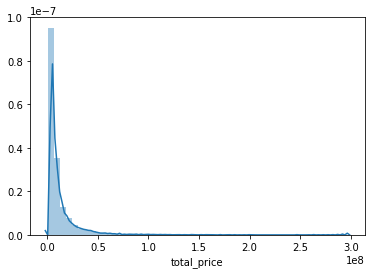

In [167]:
#價錢的分佈
#價錢的分佈
sns.distplot(train[(train['total_price']<300000000)].total_price )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


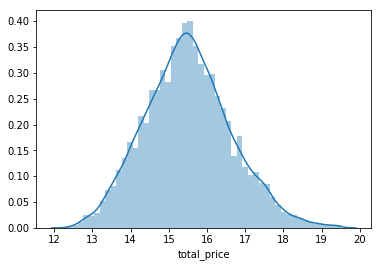

In [168]:
# 一些右偏分佈的 feature，可透過取 log 將其轉為常態分佈
sns.distplot(np.log(train[(train['total_price']<300000000)].total_price))

In [169]:
train = train.drop( labels = train[  (train['total_price']>300000000) ].index, axis = 0 )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


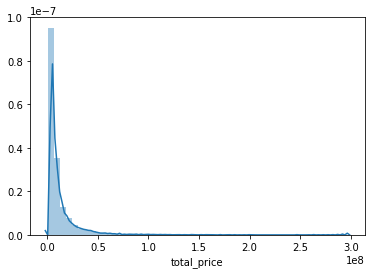

In [170]:
#價錢的分佈
sns.distplot(train.total_price)

In [171]:
train.shape

(59847, 235)

Text(0,0.5,'total_price')

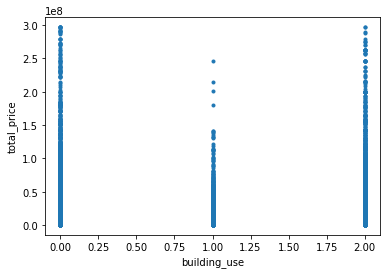

In [172]:
#價錢的分佈
#building_complete_dt>=1600
#parking_price >800000
#building_area>800
#parking_area>800
#land_area >=3000
#town_population remove
#village_income_median remove
#town_area remove

plt.plot(train.parking_way, train.total_price, '.' )
plt.xlabel('building_use')
plt.ylabel('total_price')
#print( df_train[ df_train.XIV_5000 > 4000 ].total_price ) #中刮號放條件

7814     3698.578703
10670    5533.304995
11170    1348.177475
13332    2610.666519
14007    2039.700590
16838    1247.345561
23399    1006.214497
29570    1071.162596
36482    1420.064267
37526    1106.832494
44123    1213.194703
59506    1213.194703
Name: land_area, dtype: float64


(59835, 235)

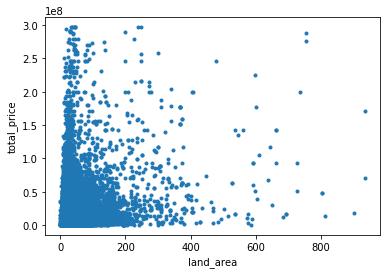

In [173]:
print( train[(train['land_area']>1000) ].land_area )
#太過於分散了，要drop欄位
train = train.drop( labels = train[  (train['land_area']>1000) ].index, axis = 0 )
#sns.distplot(train.land_area)
plt.plot(train.land_area, train.total_price, '.' )
plt.xlabel('land_area')
plt.ylabel('total_price')
train.shape

1351     3.269609e+05
8795     9.702438e+05
51731    3.837894e+05
55472    1.020404e+06
Name: parking_price, dtype: float64


(59831, 235)

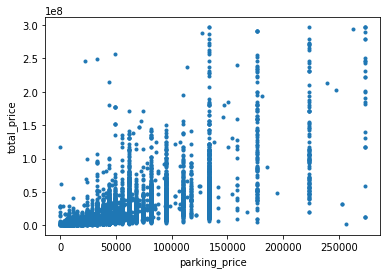

In [174]:
#train['parking_price'] = train['parking_price'].fillna(train['parking_price'].mode()[0])

print( train[(train['parking_price']>300000) ].parking_price )
#df_all['parking_price'] = df_all['parking_price'].apply(int)
train = train.drop( labels = train[  (train['parking_price']>300000) ].index, axis = 0 )
#sns.distplot(train.parking_price)
plt.plot(train.parking_price, train.total_price, '.' )
plt.xlabel('parking_price')
plt.ylabel('total_price')
train.shape

4339      90.209853
5264      47.384670
7478      40.432080
30232     61.822600
32015     41.413400
34198     44.381528
38617    967.370868
38992     83.497319
43976     40.432080
45886     40.432080
47253     84.609760
48351     40.432080
57996     40.432080
Name: parking_area, dtype: float64


(59818, 235)

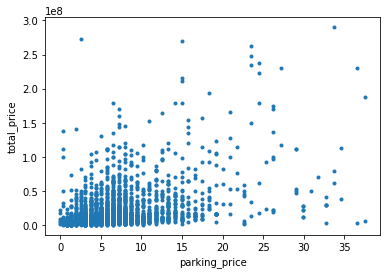

In [175]:
#train['parking_area'] = train['parking_area'].fillna(0)#train['parking_area'].mode()[0])
print( train[(train['parking_area']>40) ].parking_area )
train = train.drop( labels = train[  (train['parking_area']>40) ].index, axis = 0 )
#sns.distplot(train.parking_area)
plt.plot(train.parking_area, train.total_price, '.' )
plt.xlabel('parking_price')
plt.ylabel('total_price')
train.shape

18493    384.889444
18748    566.505953
21231    693.750804
23605    913.610349
26014    693.750804
26767    589.808827
29104    913.610349
35075    320.288104
43567    384.889444
44963    718.903165
50098    320.288104
51410    416.941144
52777    384.889444
54632    348.585199
57691    418.845282
Name: building_area, dtype: float64


Text(0,0.5,'total_price')

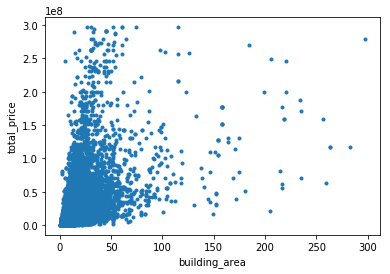

In [176]:
#train['building_area'] = train['building_area'].fillna(train['building_area'].mode()[0])

print( train[(train['building_area']>300) ].building_area )
train = train.drop( labels = train[  (train['building_area']>300) ].index, axis = 0 )
#sns.distplot(train.building_area)
plt.plot(train.building_area, train.total_price, '.' )
plt.xlabel('building_area')
plt.ylabel('total_price')

In [177]:
train.shape

(59803, 235)

In [178]:
#train = train.drop([ 'parking_area'], axis=1, inplace=True)

In [179]:
#取得數值型態的欄位
#取得數值型態欄位
numeric_data = train._get_numeric_data()
numeric_data.columns

Index(['building_material', 'city', 'txn_dt', 'total_floor', 'building_type',
       'building_use', 'building_complete_dt', 'parking_way', 'parking_area',
       'parking_price',
       ...
       'XIV_500', 'XIV_index_500', 'XIV_1000', 'XIV_index_1000', 'XIV_5000',
       'XIV_index_5000', 'XIV_10000', 'XIV_index_10000', 'XIV_MIN',
       'total_price'],
      dtype='object', length=234)

## sketch pics


In [180]:
# drop掉每個欄位的NA值並劃出其分布
#for i in numeric_data:
#    temp = train[i].dropna()
#    print(f"there are {train[i].shape[0] - temp.shape[0]} NaN in {i}")
#    sns.distplot(temp) 
    #plt.show()

## Drop Null Feature(s)

In [181]:
#df_all = pd.concat( [ train.drop( [ 'Id', 'SalePrice' ], axis = 1 ),
#                      test.drop( [ 'Id' ], axis = 1 ) ],
#                      axis = 0, ignore_index = False )
df_all = pd.concat([train.drop('total_price', axis=1), test], keys=['train', 'test'])
trainID=df_all['building_id']
trainPrice=train['total_price']
df_all.drop(['building_id'], axis=1, inplace=True)

In [182]:
trainID.shape

(69803,)

In [183]:
# check null status
#print( df_all.shape )
#df_na = df_all.select_dtypes( exclude = [ 'object' ] ).isnull().sum()
#print( df_na[ df_na > 100 ].sort_values(ascending=False) )

In [184]:
# drop掉大多為Null的欄位
#df_all = df_all.drop(['parking_area'], axis = 1) # for 486 null values (train + test)
#print( df_all.shape )

In [185]:
# drop掉大多為Null的欄位
df_all = df_all.drop(['land_area'], axis = 1) #
print(df_all.shape)

(69803, 232)


In [186]:
# drop掉大多為Null的欄位
#df_all = df_all.drop(['parking_way'], axis = 1) #
#print(df_all.shape)

In [187]:
import math
def QualToZero(x):
    #if(math.isnan(x)):
    #    return 0
    if(x==0):
        return 1
    if(x==1):
        return 2
    if(x==2):
        return 0
    return x

df_all['parking_way'] = df_all['parking_way'].apply(QualToZero)

In [188]:
df_all["parking_area"] = df_all[(df_all['parking_way']==0)]["parking_area"].fillna(0)#df_all['parking_area'].mode()[0])



In [189]:

#df_all["parking_area"] = df_all[(df_all['building_area'].isna()) ].fillna(df_all['parking_area'].median()[0])

#df_all["parking_area"]  = df_all.groupby("city")["parking_area"].transform(lambda x: x.fillna(x.median()))
#df_all["parking_price"]  = df_all.groupby("city")["parking_price"].transform(lambda x: x.fillna(x.median()))
df_all["parking_area"] = df_all[(df_all['parking_way']==0)]["parking_area"].fillna(0)#df_all['parking_area'].mode()[0])
df_all["parking_area"] = df_all[(df_all['parking_way']==1)]["parking_area"].fillna(df_all[(df_all['parking_way']==1)]['parking_area'].median())
df_all["parking_area"] = df_all[(df_all['parking_way']==2)]["parking_area"].fillna(df_all[(df_all['parking_way']==2)]['parking_area'].median())



df_all['parking_price'] = df_all[(df_all['parking_way']==0)]['parking_price'].fillna(0)
df_all['parking_price'] = df_all[(df_all['parking_way']==1)]['parking_price'].fillna(df_all[(df_all['parking_way']==1)]['parking_price'].median())
df_all['parking_price'] = df_all[(df_all['parking_way']==2)]['parking_price'].fillna(df_all[(df_all['parking_way']==1)]['parking_price'].median())

#df_all['building_area'] = df_all['building_area'].fillna(df_all['building_area'].mode()[0])

df_all['village_income_median'] = df_all.groupby("city")["village_income_median"].transform(lambda x: x.fillna(x.mode()))
#df_all['village_income_median'] = df_all['village_income_median'].fillna(df_all['village_income_median'].mode()[0])
#df_all['txn_floor'] = df_all.groupby("city")["txn_floor"].transform(lambda x: x.fillna(x.mode()))

#
#df_all["parking_price"] = df_all.groupby("city")["parking_price"].transform(lambda x: x.fillna(x.mean()))
df_all["txn_floor"] = df_all.groupby("city")["txn_floor"].transform(lambda x: x.fillna(x.mode()))
#df_all['txn_floor'] = df_all['txn_floor'].fillna(df_all['txn_floor'].mode()[0])    

#df_all["LotFrontage"] = df_all.groupby("BldgType")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#df_all['LotFrontage'] = df_all['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
#df_all['MasVnrArea'] = df_all['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
#df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

/opt/conda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1019: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Text(0,0.5,'total_price')

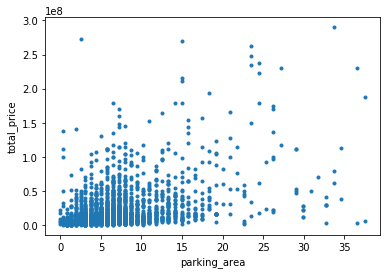

In [190]:
plt.plot(train.parking_area, train.total_price, '.' )
plt.xlabel('parking_area')
plt.ylabel('total_price')

Text(0,0.5,'total_price')

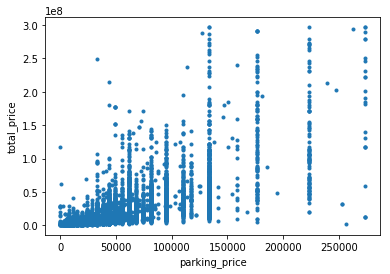

In [191]:
plt.plot(train.parking_price, train.total_price, '.' )
plt.xlabel('parking_price')
plt.ylabel('total_price')

Text(0,0.5,'total_price')

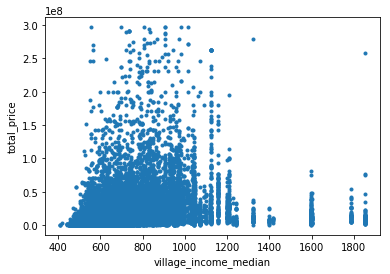

In [192]:
plt.plot(train.village_income_median, train.total_price, '.' )
plt.xlabel('village_income_median')
plt.ylabel('total_price')

Text(0,0.5,'total_price')

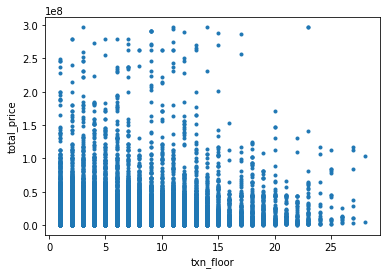

In [193]:
plt.plot(train.txn_floor, train.total_price, '.' )
plt.xlabel('txn_floor')
plt.ylabel('total_price')

In [194]:
# Working with ordinal predictors
def QualToInt(x):
    if(x=='Ex'):
        r = 0
    elif(x=='Gd'):
        r = 1
    elif(x=='TA'):
        r = 2
    elif(x=='Fa'):
        r = 3
    elif(x=='missing'):
        r = 4
    else:
        r = 5
    return r

#df_all['ExterQual'] = df_all['ExterQual'].apply(QualToInt)

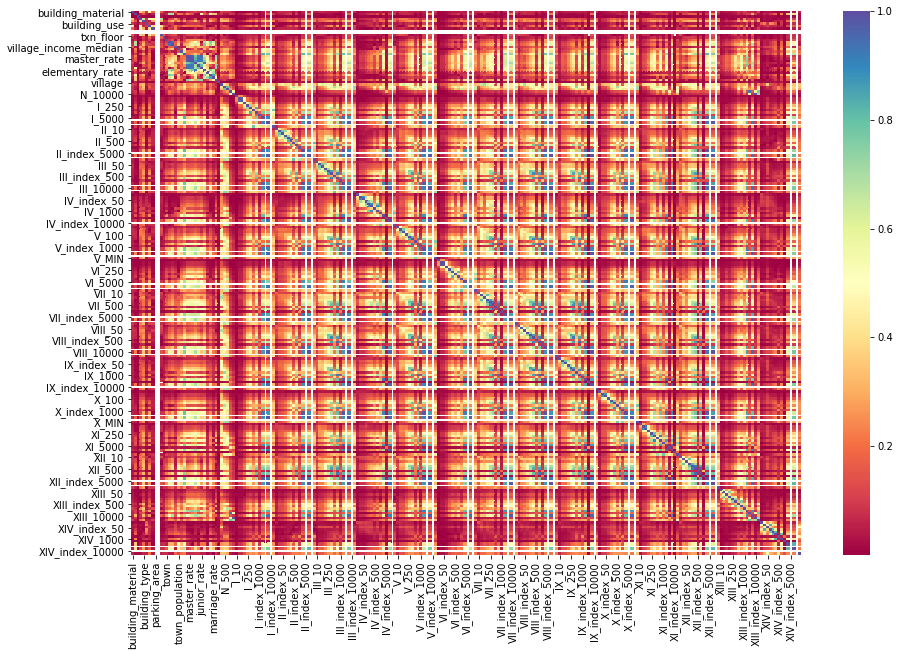

In [195]:
## Numerical to Categorical
# 嘗試不同的顏色"Spectral"：
corr_matrix=df_all.corr().abs()
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix,cmap='Spectral')

## Numerical to Categorical

In [196]:
# df_train[['OverallCond', 'SalePrice']].groupby(['OverallCond']).agg({'SalePrice':'median', 'OverallCond':'count'}).sort_values(by='SalePrice', ascending=False)
#train[['MSSubClass', 'SalePrice']].groupby(['MSSubClass']).agg({'SalePrice':'median', 'MSSubClass':'count'}).sort_values(by='SalePrice', ascending=False)

In [197]:
# It helps to transform some numerical features to categorical
#df_all.YearBuilt = df_all.YearBuilt.astype ( str )

In [198]:
# handle skewness
train.total_price = np.log( train.total_price )
# exclude object型態的欄位
num_feats = df_all.select_dtypes( exclude = [ 'object' ] ).columns
# na drop should be done series by series
# apply function>>幫助我們算出偏差系數
skewed_feats = df_all[ num_feats ].apply( func = lambda s: skew(s.dropna()), axis = 0 )
print(skewed_feats)
# 選出dataframe大於0.75的人
skewed_feats = skewed_feats[ skewed_feats > 0.75 ].index
# print(skewed_feats)
# 把大於0.75的要作正規化，變成常態分配
# np.log1p是log(1+x), 若直接取log會有log0的問題
df_all[ skewed_feats ] = np.log1p( df_all[ skewed_feats ] )



building_material           -2.506124
city                         0.722985
txn_dt                      -0.158829
total_floor                  1.104158
building_type                0.116337
building_use                 3.594980
building_complete_dt        -0.029036
parking_way                  1.833060
parking_area                      NaN
parking_price                     NaN
txn_floor                    1.353766
building_area              120.268834
town                         0.296283
lat                         -1.215566
lon                         -0.760107
village_income_median        2.815278
town_population              0.644876
town_area                    1.987735
town_population_density      0.769879
doc_rate                     1.502881
master_rate                  1.442493
bachelor_rate                1.227539
jobschool_rate              -0.015703
highschool_rate             -1.105385
junior_rate                 -1.145378
elementary_rate              0.850523
born_rate   

In [199]:
#df_all.describe(include = "O")
df_all.shape

(69803, 232)

## One-Hot Encoding

In [200]:
df_all_dum = pd.get_dummies(df_all); df_all_dum.head()

building_material  city  txn_dt  total_floor  building_type  \
train 0                  8    21   18674     1.609438              3   
      1                  8     7   18800     1.791759              1   
      2                  8     7   19289     1.609438              1   
      3                  8    21   20385     3.218876              0   
      4                  1    21   20657     1.098612              4   

         building_use  building_complete_dt  parking_way  parking_area  \
train 0      1.098612                  6271     0.000000           NaN   
      1      1.098612                  7885     0.000000           NaN   
      2      1.098612                  6028     0.000000           NaN   
      3      1.098612                 18325     0.693147           NaN   
      4      1.098612                  6880     0.000000           NaN   

         parking_price    ...      XIV_250   XIV_500  XIV_index_500  XIV_1000  \
train 0            NaN    ...     3.091042  4.077537              1  5.062595   
      1            NaN    ...     2.079442  3.367296              1  4.753590   
      2            NaN    ...     3.332205  4.369448              1  5.361292   
      3            NaN    ...     1.098612  3.044522              1  4.836282   
      4            NaN    ...     1.098612  2.944439              1  3.871201   

         XIV_index_1000  XIV_5000  XIV_index_5000  XIV_10000  XIV_index_10000  \
train 0               1  7.817625               1       6011                1   
      1               1  9.672375               1      32221                1   
      2               1  9.665294               1      32228                1   
      3               1  7.851272               1       7271                1   
      4               1  7.858641               1       7442                1   

          XIV_MIN  
train 0  3.568682  
      1  3.715365  
      2  4.015700  
      3  4.611440  
      4  4.829363  

[5 rows x 232 columns]

In [201]:
# 將NA的值填平均值
#df_all_dum = df_all_dum.fillna( df_all_dum.mean() ); df_all_dum.head()

In [202]:
df_all.shape

(69803, 232)

In [203]:
#from sklearn.preprocessing import LabelEncoder
#cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
#for c in cols:
#    lbl = LabelEncoder() 
#    lbl.fit(list(df_all[c].values)) 
#    df_all[c] = lbl.transform(list(df_all[c].values))

# shape        
print('Shape all_data: {}'.format(df_all.shape))

Shape all_data: (69803, 232)


In [204]:
np.any(np.isnan(df_all_dum))
df_all_dum.columns[df_all_dum.isna().any()].tolist()

['parking_area', 'parking_price', 'txn_floor', 'village_income_median']

In [205]:
## Standardization

## Standardization

In [206]:
# normalization helps a bit
from sklearn import preprocessing

#num_feats = df_all_dum.select_dtypes( exclude = [ 'object' ] ).columns
df_all_dum[ num_feats ] = preprocessing.scale( df_all_dum[ num_feats ] )
df_all_dum[ num_feats ].head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
np.any(np.isnan(df_all_dum))
df_all_dum.columns[df_all_dum.isna().any()].tolist()

In [ ]:
# 查詢是否有重複的欄位
df_all_dum.columns[df_all_dum.columns.duplicated()]

## Training Start

In [ ]:
# inputs
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
X = df_all_dum[:train.shape[0]]
y = train.total_price
#把train data與test分開
X, X_val, y, y_val = train_test_split(X, y, test_size = 0.1, random_state = 40)

X_test = df_all_dum[ train.shape[0]: ]

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 5))
    return(rmse)

In [ ]:
def error(yhat,y_pred):
    error_sum = ((yhat - y_pred)/y_pred*100)
    mask = (error_sum>10).sum()+(error_sum<-10).sum()
    print(mask)
    return error_sum

In [ ]:
#y_answer_pred = y_pred_rf# * 0.5 + y_pred * 0.5
#print(error(np.array(np.exp(y)),np.exp(y_answer_pred)))

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

In [ ]:
#https://www.kaggle.com/pablocastilla/predict-house-prices-with-xgboost-regression
#model_XGB = XGBRegressor(colsample_bytree=0.4,
#                 gamma=0,                 
#                 learning_rate=0.07,
#                 max_depth=3,
#                 min_child_weight=1.5,
#                 n_estimators=10000,                                                                    
#                 reg_alpha=0.75,
#                 reg_lambda=0.45,
#                 subsample=0.6,
#                 seed=42) 

#model_XGB = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.05, max_depth=3, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1)

#model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
#                             learning_rate=0.01, max_depth=5, 
#                             min_child_weight=1.7817, n_estimators=4000,objective='reg:linear',
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)

model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=4000,objective='reg:linear',
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_XGB.fit(X, y)
y_pred = model_XGB.predict( X )
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

val_preds = model_XGB.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

In [ ]:
import pickle
#save model
pickle.dump(model_XGB, open("./savemodel/xgb_0514_median.dat", "wb"))

In [207]:
np.exp(y_pred)

array([ 5769380. , 75332820. ,  5271392.5, ...,  2669394.8,  5843542.5,
        5842561.5], dtype=float32)

In [208]:
np.array(np.exp(y))

array([ 5328714.65890591, 76276179.91749465,  4553334.27287215, ...,
        2636755.25984292,  7001229.73332825,  6730861.37805399])

In [209]:
pd.DataFrame({'total_price': np.exp(y_pred)}).to_csv('submission_y_xgb_0514_median_2.csv')

In [210]:
pd.DataFrame({'total_price': np.array(np.exp(y))}).to_csv('submission_y_2.csv')

In [211]:
print(error(np.array(np.exp(y)),np.exp(y_pred)))

15850
[ -7.63800168   1.25226159 -13.621794   ...  -1.22272999  19.81139409
  15.2039457 ]


In [212]:
y.shape

(53822,)

In [213]:
y_answer_XGB = model_XGB.predict( X_test )
y_answer_XGB = np.exp(y_answer_XGB)
print(pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).head())
pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).to_csv('submission_xgb_0514_median.csv')

                   total_price
building_id                   
X5gsdTWGS3W7JJQB  1.051763e+07
BTshNOJyKHnT2YIT  4.258238e+06
dhdymr0lV8N5kZOT  1.106536e+07
VEwyGGMcD56w5BOc  5.843766e+06
wmUeMoJZfsqaSX9b  9.925853e+05


In [214]:
y_answer_XGB = model_XGB.predict( X_test )
y_answer_XGB = np.exp(y_answer_XGB)
print(pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).head())

                   total_price
building_id                   
X5gsdTWGS3W7JJQB  1.051763e+07
BTshNOJyKHnT2YIT  4.258238e+06
dhdymr0lV8N5kZOT  1.106536e+07
VEwyGGMcD56w5BOc  5.843766e+06
wmUeMoJZfsqaSX9b  9.925853e+05


In [215]:
pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).to_csv('submission_xgb_0514_4000.csv')

In [529]:
#model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
#                             learning_rate=0.01, max_depth=3, 
#                             min_child_weight=1, n_estimators=10000,objective='reg:linear',
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)

#https://github.com/Cuongvn08/tensorflow_kaggle_house_price/blob/master/train.py
#model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.05, max_depth=3, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1)
#import lightgbm as lgb
#model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                              learning_rate=0.05, n_estimators=720,
#                              max_bin = 55, bagging_fraction = 0.8,
#                              bagging_freq = 5, feature_fraction = 0.2319,
#                              feature_fraction_seed=9, bagging_seed=9,
#                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
#                             learning_rate=0.01, max_depth=6, 
#                             min_child_weight=5, n_estimators=4000,objective='reg:linear',
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)

#model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
#                             learning_rate=0.01, max_depth=7, 
#                             min_child_weight=4, n_estimators=5000,objective='reg:linear',
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)
#colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.1, max_depth=7, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1


#colsample_bylevel=1,colsample_bytree=1, gamma=0, 
#                             learning_rate=0.1, max_delta_step=0,max_depth=7, 
#                             min_child_weight=1,missing=None, n_estimators=2200,nthread=-1,objective='reg:linear',
#                             reg_alpha=0, reg_lambda=1,scale_pos_weight=1,seed=1850,
#                              silent=True,subsample=1,
#                             random_state =7
#model_XGB = XGBRegressor()
#model_XGB.fit(X, y)
#y_pred = model_XGB.predict( X )
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
#print('  R2:', metrics.r2_score(y, y_pred))

In [530]:
#val_preds = model_XGB.predict(X_val)

#print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
#print('  R2:', metrics.r2_score( y_val, val_preds ) )


In [531]:
#y_answer_XGB = model_XGB.predict( X_test )
#y_answer_XGB = np.exp(y_answer_XGB)
#print(pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).head())

In [532]:
#pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).to_csv('submission_xgb_0513_2200.csv')

In [533]:
#import pickle
#save model
#pickle.dump(model_XGB, open("./savemodel/submission_xgb_0513_2200.dat", "wb"))

In [534]:
from sklearn.linear_model import LassoCV
model_Lasso = LassoCV( alphas = [  0.0005],normalize=True, max_iter=1e5).fit( X, y )
print( rmse_cv( model_Lasso ), model_Lasso.alpha_ )

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

[0.34955499 0.35143578 0.34923181 0.3494124  0.34489918] 0.0005


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [535]:
coef = pd.Series( model_Lasso.coef_, index = X.columns )
print( sum(coef != 0), sum(coef == 0))

162 71


Text(0.5,1,'Coefficients in Model Lasso')

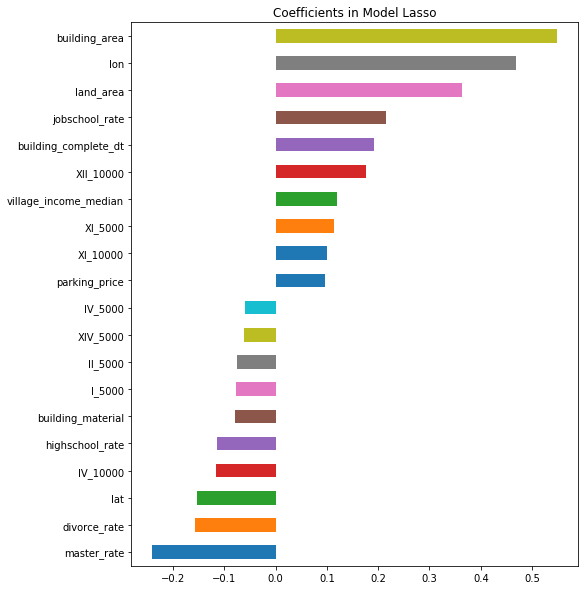

In [536]:
important_coef = pd.concat( [coef.sort_values().head(10), coef.sort_values().tail(10)] )
rcParams['figure.figsize'] = (8.0, 10.0)
important_coef.plot(kind = 'barh')
plt.title('Coefficients in Model Lasso')

In [537]:

preds = model_Lasso.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, preds)))
print('  R2:', metrics.r2_score( y, preds ) )

RMSE: 0.3476632376063508
  R2: 0.89937634258103


In [538]:
val_preds = model_Lasso.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.35204820634240597
  R2: 0.8985208453599165


In [539]:
y_answer_Lasso = model_Lasso.predict( X_test )
y_answer_Lasso = np.exp(y_answer_Lasso)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'total_price': y_answer_Lasso}, index=test.building_id).head())

                   total_price
building_id                   
X5gsdTWGS3W7JJQB  7.651226e+06
BTshNOJyKHnT2YIT  3.471450e+06
dhdymr0lV8N5kZOT  8.217489e+06
VEwyGGMcD56w5BOc  6.293808e+06
wmUeMoJZfsqaSX9b  1.208777e+06


In [540]:
pd.DataFrame({'total_price': y_answer_Lasso}, index=test.building_id).to_csv('submission_0514_Lasso.csv')

In [ ]:
import pickle
#save model
pickle.dump(model_Lasso, open("./savemodel/submission_0514_Lasso.dat", "wb"))

In [544]:
y_answer_pred = preds * 0.5 + y_pred * 0.5
print(error(np.array(np.exp(y)),np.exp(y_answer_pred)))

33140
[10.69121876 12.54445993 35.4999815  ...  4.25857896  5.20372053
 63.35989015]


In [545]:
y.shape

(53315,)

In [542]:
# Lasso + XGB
y_answer = y_answer_Lasso * 0.5 + y_answer_XGB * 0.5
print(pd.DataFrame({'total_price': y_answer}, index=test.building_id).head())

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'total_price': y_answer}, index=test.building_id).to_csv('submission_0514_LX.csv')

                   total_price
building_id                   
X5gsdTWGS3W7JJQB  8.831089e+06
BTshNOJyKHnT2YIT  3.753854e+06
dhdymr0lV8N5kZOT  8.702886e+06
VEwyGGMcD56w5BOc  6.010912e+06
wmUeMoJZfsqaSX9b  1.079262e+06
RMSE: 0.35204820634240597
  R2: 0.8985208453599165


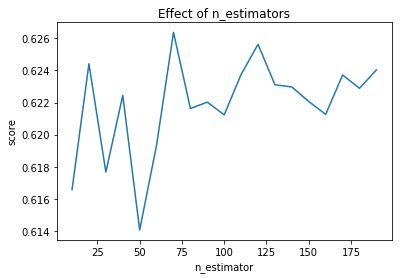

In [740]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators = 12,max_depth = 3,n_jobs = -1)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model_rf.set_params(n_estimators=n)
    model_rf.fit(X, y)
    scores.append(model_rf.score(X, y))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [747]:
model_rf.fit(X,y)
y_pred_rf = model_rf.predict(X)
score_rf = np.sqrt(mean_squared_error(y, y_pred_rf))
print("RandomForest Score :",score_rf)

#y_pred_rf_test = model_rf.predict(test_new)
#y_pred_rf_test = np.exp(y_pred_rf_test)

RandomForest Score : 0.673386407577646


In [748]:
y_pred_rf.shape

(53320,)

In [ ]:
#LassoCV

In [ ]:

kf = KFold(n_splits = 5, random_state = None, shuffle = True)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
# print(list(kf.split(X)))
for train_index, val_index in kf.split(X):
#     print('train_index:', train_index)
#     print('val_index:', val_index)
    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice_N'], index = train_index)
    y_train = y.values[ train_index ]
    y_val = pd.DataFrame(data = y.values[val_index], columns = ['SalePrice'], index = val_index)
    model_XGB = XGBRegressor()
#    model_XGB = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.1, max_depth=5, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)
    model_XGB.fit(X_train, y_train)
    y_pred = model_XGB.predict(X_val)
    y_ans = model_XGB.predict(X_test)
#     print(y_ans.shape)
    pred_tmp+=np.exp(y_ans)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
    print('  R2:', metrics.r2_score(y_val, y_pred))
y_answer_XGB = pred_tmp/5

## Decision Tree

In [ ]:
#https://www.itread01.com/content/1545151168.html

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
#parameters={'colsample_bytree':[0.4603], 'gamma':[0.0468], 
#                             'learning_rate':[0.1,0.05,0.01], 'max_depth':[6,7,8], 
#                             'min_child_weight':[4], 'n_estimators':[2200],
#                             'reg_alpha':[0.4640], 'reg_lambda':[0.8571],
#                             'subsample:':[0.5213], 'silent':[1],
#                             'random_state' :[7], 'nthread' : [-1]}

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.01], #so called `eta` value
              'max_depth': [7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

#xgb_grid = GridSearchCV(xgb1,
#                        parameters,
#                        cv = 2,
#                        n_jobs = 5,
#                        verbose=True)

#xgb_grid.fit(X,y)

#print(xgb_grid.best_score_)
#print(xgb_grid.best_params_)

In [ ]:
#val_preds = xgb_grid.predict(X_val)

#print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
#print('  R2:', metrics.r2_score( y_val, val_preds ) )

In [ ]:
#y_answer_XGB = xgb_grid.predict( X_test )
#y_answer_XGB = np.exp(y_answer_XGB)
#print(pd.DataFrame({'SalePrice': y_answer_XGB}, index=test.Id).head())

In [ ]:
#pd.DataFrame({'SalePrice': y_answer_XGB}, index=test.Id).to_csv('submission_xgb.csv')

## SVR

In [ ]:
# KFold Data Split

from sklearn.svm import SVR
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state = None, shuffle = False)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
for train_index, val_index in kf.split(X):
    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice'], index = train_index)
    y_train = y.values[ train_index ]
    y_val = pd.DataFrame(data = y.values[val_index], columns = ['total_price'], index = val_index)
    print(train_index)
    model_SVR = SVR(kernel='rbf', gamma=0.002)
    model_SVR.fit(X_train, y_train)
    print('predict')
    y_pred = model_SVR.predict(X_val)
    y_ans = model_SVR.predict(X_test)
    pred_tmp+=np.exp(y_ans)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
    print('  R2:', metrics.r2_score(y_val, y_pred))
y_answer_SVR = pred_tmp/5

In [ ]:
model_SVR = SVR(kernel='rbf', gamma=0.002)
model_SVR.fit(X, y)
y_answer_SVR = model_SVR.predict( X_test )
y_answer_SVR = np.exp(y_answer_SVR)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'total_price': y_answer_SVR}, index=test.building_id).head())

In [ ]:
pd.DataFrame({'total_price': y_answer_SVR}, index=test.building_id).to_csv('submission_SVR.csv')

## LassoCV

In [ ]:
from sklearn.linear_model import LassoCV
model_Lasso = LassoCV( alphas = [ 1, 0.1, 0.01, 0.001, 0.0005, 0.0004, 0.0003, 0.0002 ],
                       max_iter = 2000 ).fit( X, y )
print( rmse_cv( model_Lasso ), model_Lasso.alpha_ )

In [ ]:
coef = pd.Series( model_Lasso.coef_, index = X.columns )
print( sum(coef != 0), sum(coef == 0))

In [ ]:
important_coef = pd.concat( [coef.sort_values().head(10), coef.sort_values().tail(10)] )
rcParams['figure.figsize'] = (8.0, 10.0)
important_coef.plot(kind = 'barh')
plt.title('Coefficients in Model Lasso')

In [ ]:

preds = model_Lasso.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, preds)))
print('  R2:', metrics.r2_score( y, preds ) )

In [ ]:
val_preds = model_Lasso.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

In [ ]:
y_answer_Lasso = model_Lasso.predict( X_test )
y_answer_Lasso = np.exp(y_answer_Lasso)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'total_price': y_answer_Lasso}, index=test.building_id).head())

In [ ]:
pd.DataFrame({'total_price': y_answer_Lasso}, index=test.building_id).to_csv('submission_Lasso_drop.csv')

In [179]:
y_pred = model_SVR.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

RMSE: 0.10138901729916881
  R2: 0.934380883634592


In [180]:
val_preds = model_SVR.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.11178810224904052
  R2: 0.9232328827938405


In [181]:
model_SVR = SVR(kernel='rbf', gamma=0.002)
model_SVR.fit(X, y)
y_answer_SVR = model_SVR.predict( X_test )
y_answer_SVR = np.exp(y_answer_SVR)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'SalePrice': y_answer_SVR}, index=test.Id).head())

          SalePrice
Id                 
1461  119564.485424
1462  156653.579860
1463  171243.151646
1464  190406.991972
1465  193886.623344


In [182]:
pd.DataFrame({'SalePrice': y_answer_SVR}, index=test.Id).to_csv('submission_SVR.csv')

In [185]:
#RandomForestClassifier 效果不好
clf = RandomForestClassifier()
clf.fit(X, y.astype('int'))
y_pred = clf.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

RMSE: 0.6077254179680507
  R2: -1.357563246168168


In [186]:
val_preds = clf.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.6026382665096865
  R2: -1.2309892387712504


In [187]:

y_answer_rm = clf.predict( X_test )
y_answer_rm = np.exp(y_answer_rm)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'SalePrice': y_answer_rm}, index=test.Id).head())

          SalePrice
Id                 
1461   59874.141715
1462   59874.141715
1463  162754.791419
1464  162754.791419
1465  162754.791419


## Blending

In [96]:
# Lasso + SVR
y_answer = y_answer_Lasso * 0.75 + y_answer_SVR * 0.25
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LS_Best.csv')

          SalePrice
Id                 
1461  116306.877254
1462  156581.025459
1463  176170.412685
1464  191485.161847
1465  195519.510106
RMSE: 0.11178810224904052
  R2: 0.9232328827938405


In [97]:
# Lasso + XGB
y_answer = y_answer_Lasso * 0.75 + y_answer_XGB * 0.25
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LX.csv')

          SalePrice
Id                 
1461  116870.775429
1462  158092.478150
1463  177635.847430
1464  190654.937292
1465  196155.229270
RMSE: 0.11178810224904052
  R2: 0.9232328827938405


In [98]:
# Lasso + SVR + XGB
y_answer = y_answer_Lasso * 0.72 + y_answer_SVR * 0.04 + y_answer_XGB * 0.24
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
#print('  R2:', metrics.r2_score( y_answer, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LSX.csv')

          SalePrice
Id                 
1461  116978.523439
1462  158034.920031
1463  177380.137723
1464  190645.017135
1465  196064.483158
RMSE: 0.11178810224904052


In [99]:
# Lasso + SVR + XGB -2
y_answer = (y_answer_Lasso + y_answer_SVR + y_answer_XGB) /3
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LSX3.csv')

          SalePrice
Id                 
1461  118868.523805
1462  158636.603715
1463  175386.958434
1464  189779.212509
1465  195459.976346


In [100]:
# SVR + XGB
y_answer = y_answer_SVR * 0.3 + y_answer_XGB * 0.7
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())

pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_SX.csv')

          SalePrice
Id                 
1461  121143.400315
1462  160885.644271
1463  175346.367369
1464  188082.363217
1465  195666.627628
